In [1]:
import dealwithpath
from TDQT import *
import dill

/eos/home-i00/d/drousso/SWAN_projects/TDQT_NEW/Examples/../TDQT/device_defn.py:112: RuntimeWarning: divide by zero encountered in divide
  Target_P0ss[:size_lead_L,:size_lead_L]=np.diag(expit(- (E_L - mu_L) / (kB * T_L)))
/eos/home-i00/d/drousso/SWAN_projects/TDQT_NEW/Examples/../TDQT/device_defn.py:113: RuntimeWarning: divide by zero encountered in divide
  Target_P0ss[-size_lead_R:,-size_lead_R:]=np.diag(expit(- (E_R - mu_R) / (kB * T_R)))
/eos/home-i00/d/drousso/SWAN_projects/TDQT_NEW/Examples/../TDQT/device_defn.py:114: RuntimeWarning: divide by zero encountered in divide
  Target_P0ss[size_lead_L:size_lead_L+size_EM,size_lead_L:size_lead_L+size_EM]=np.diag(expit(- (E_EM - mu_EM) / (kB * T_EM)))


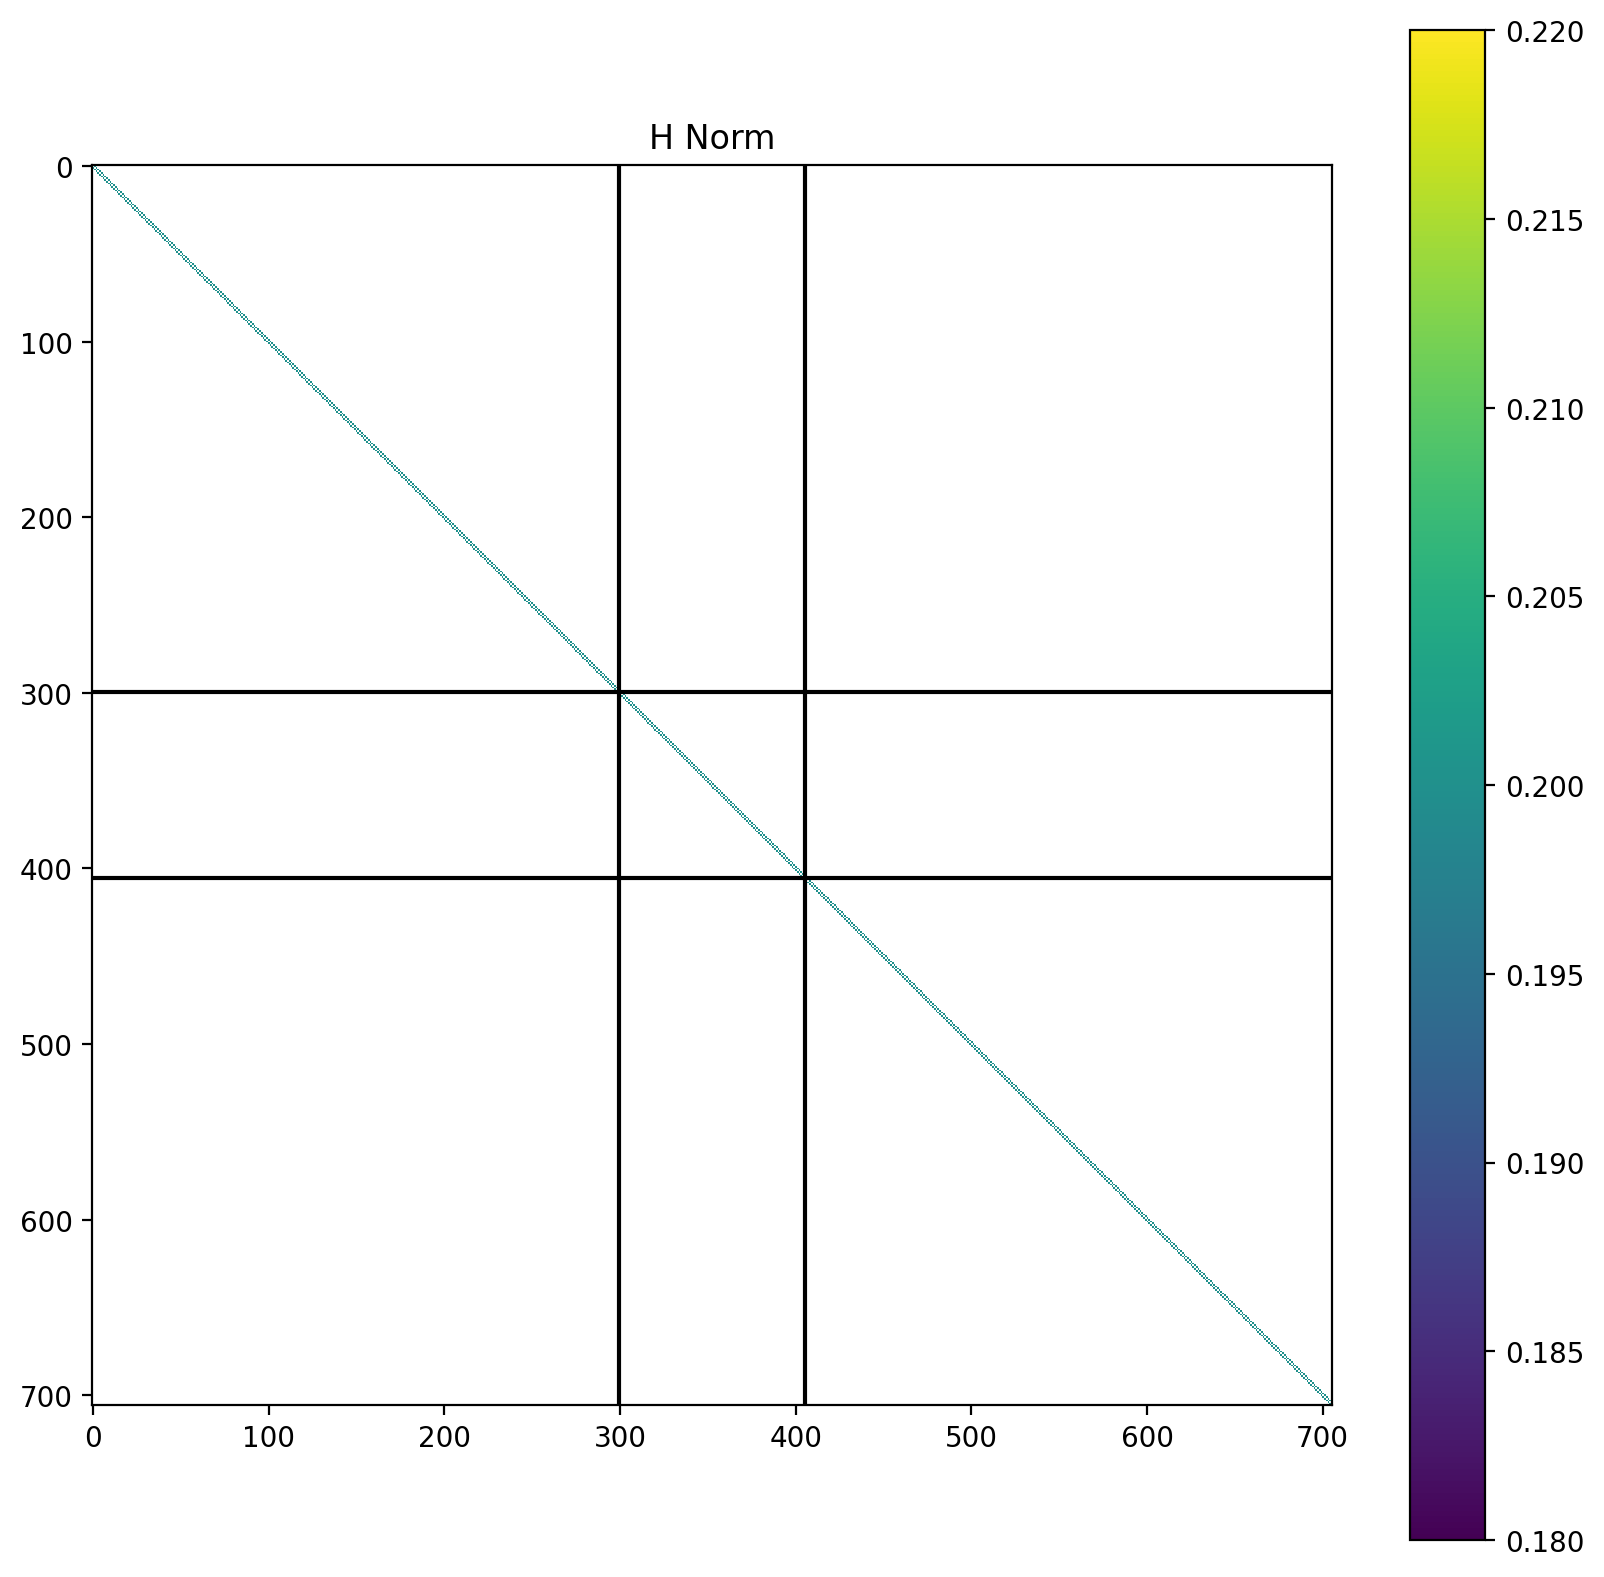

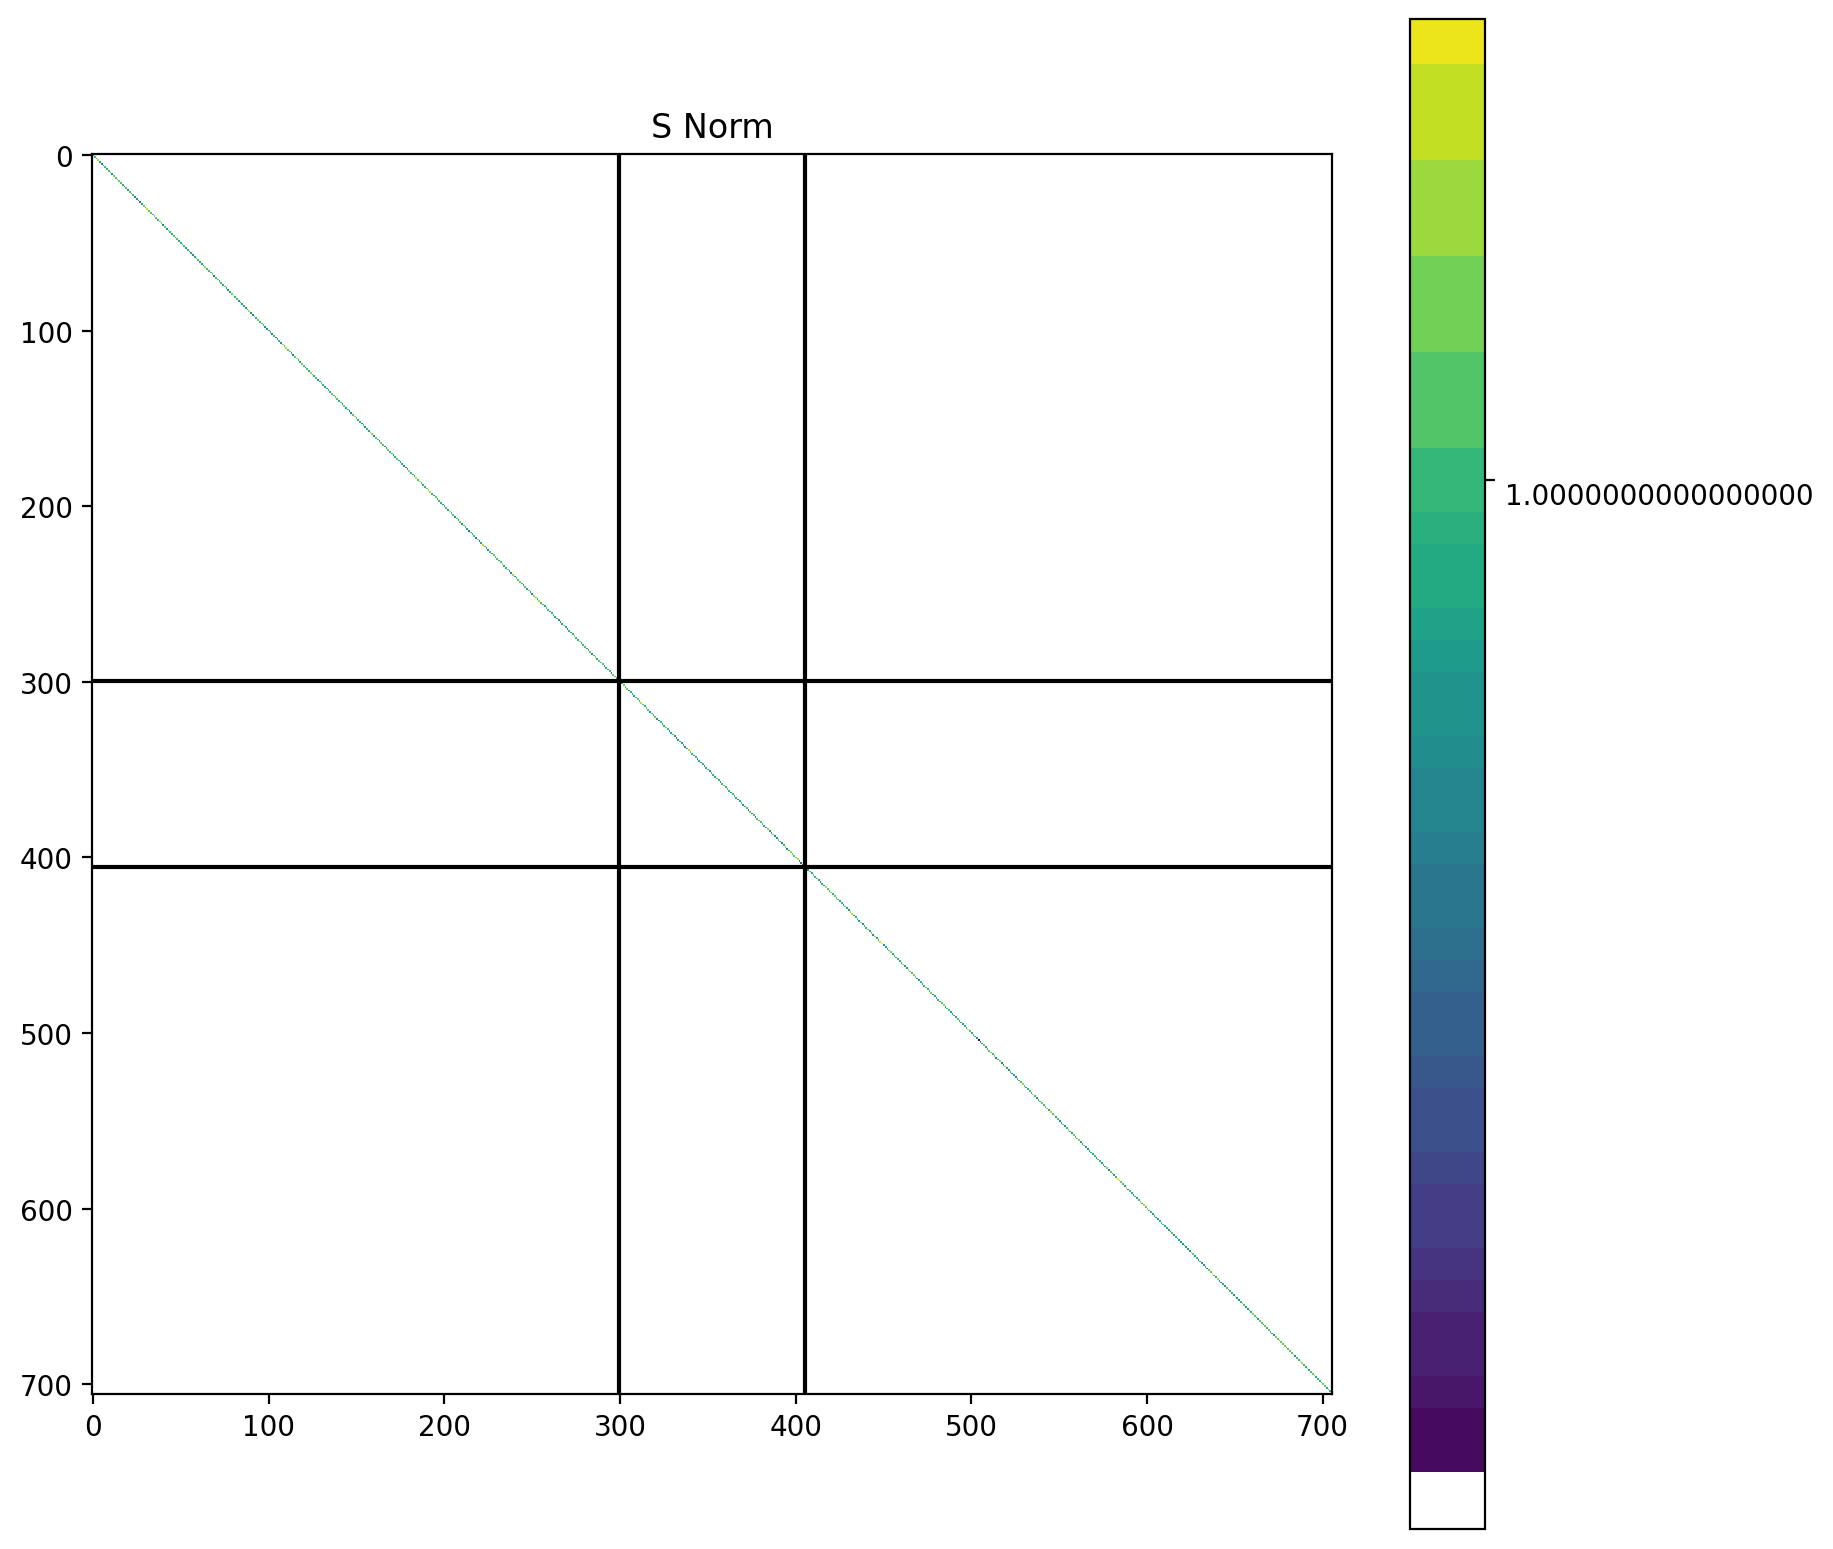

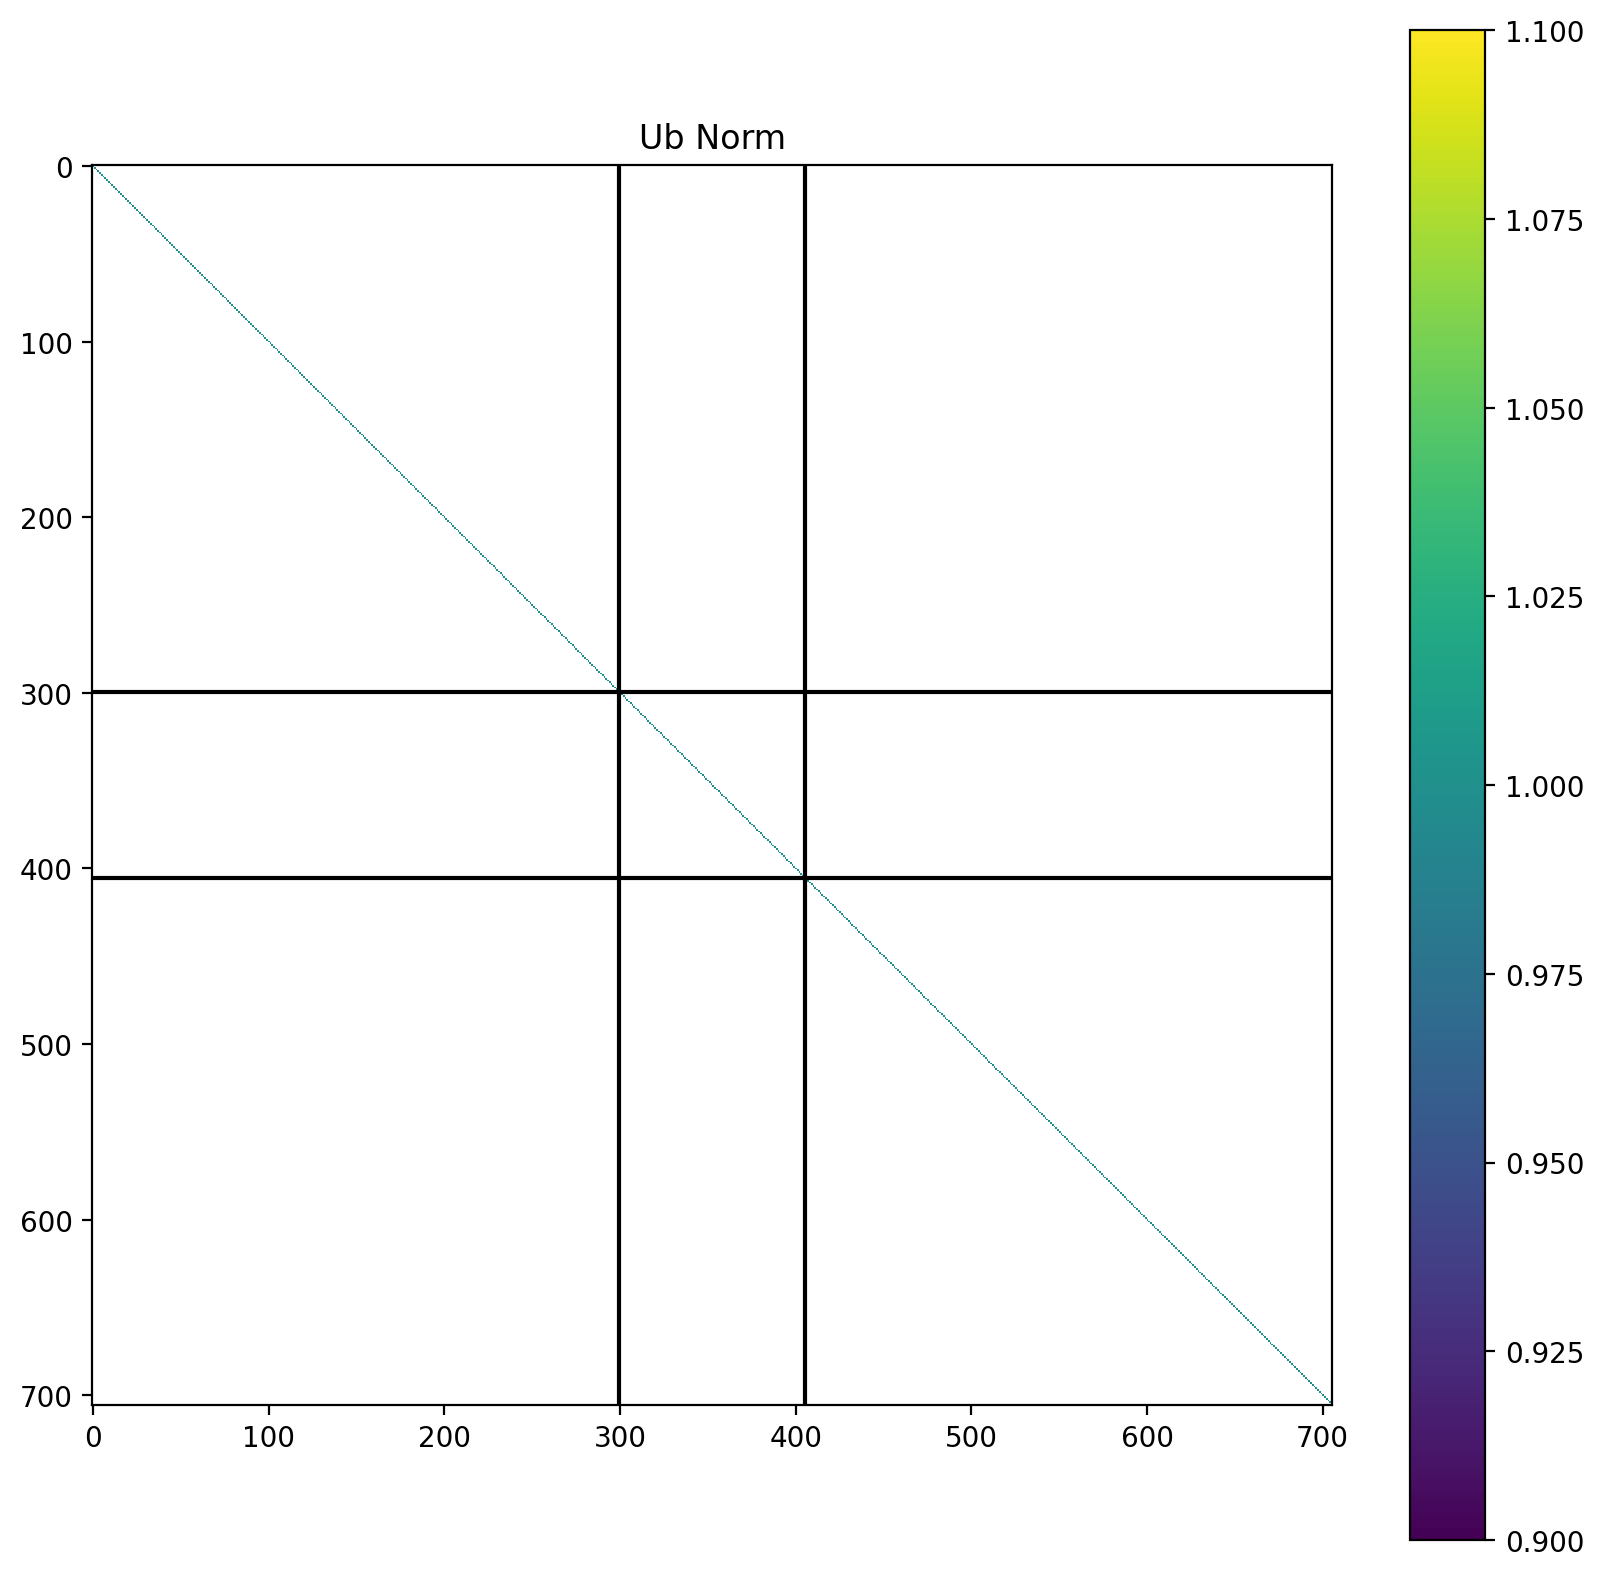

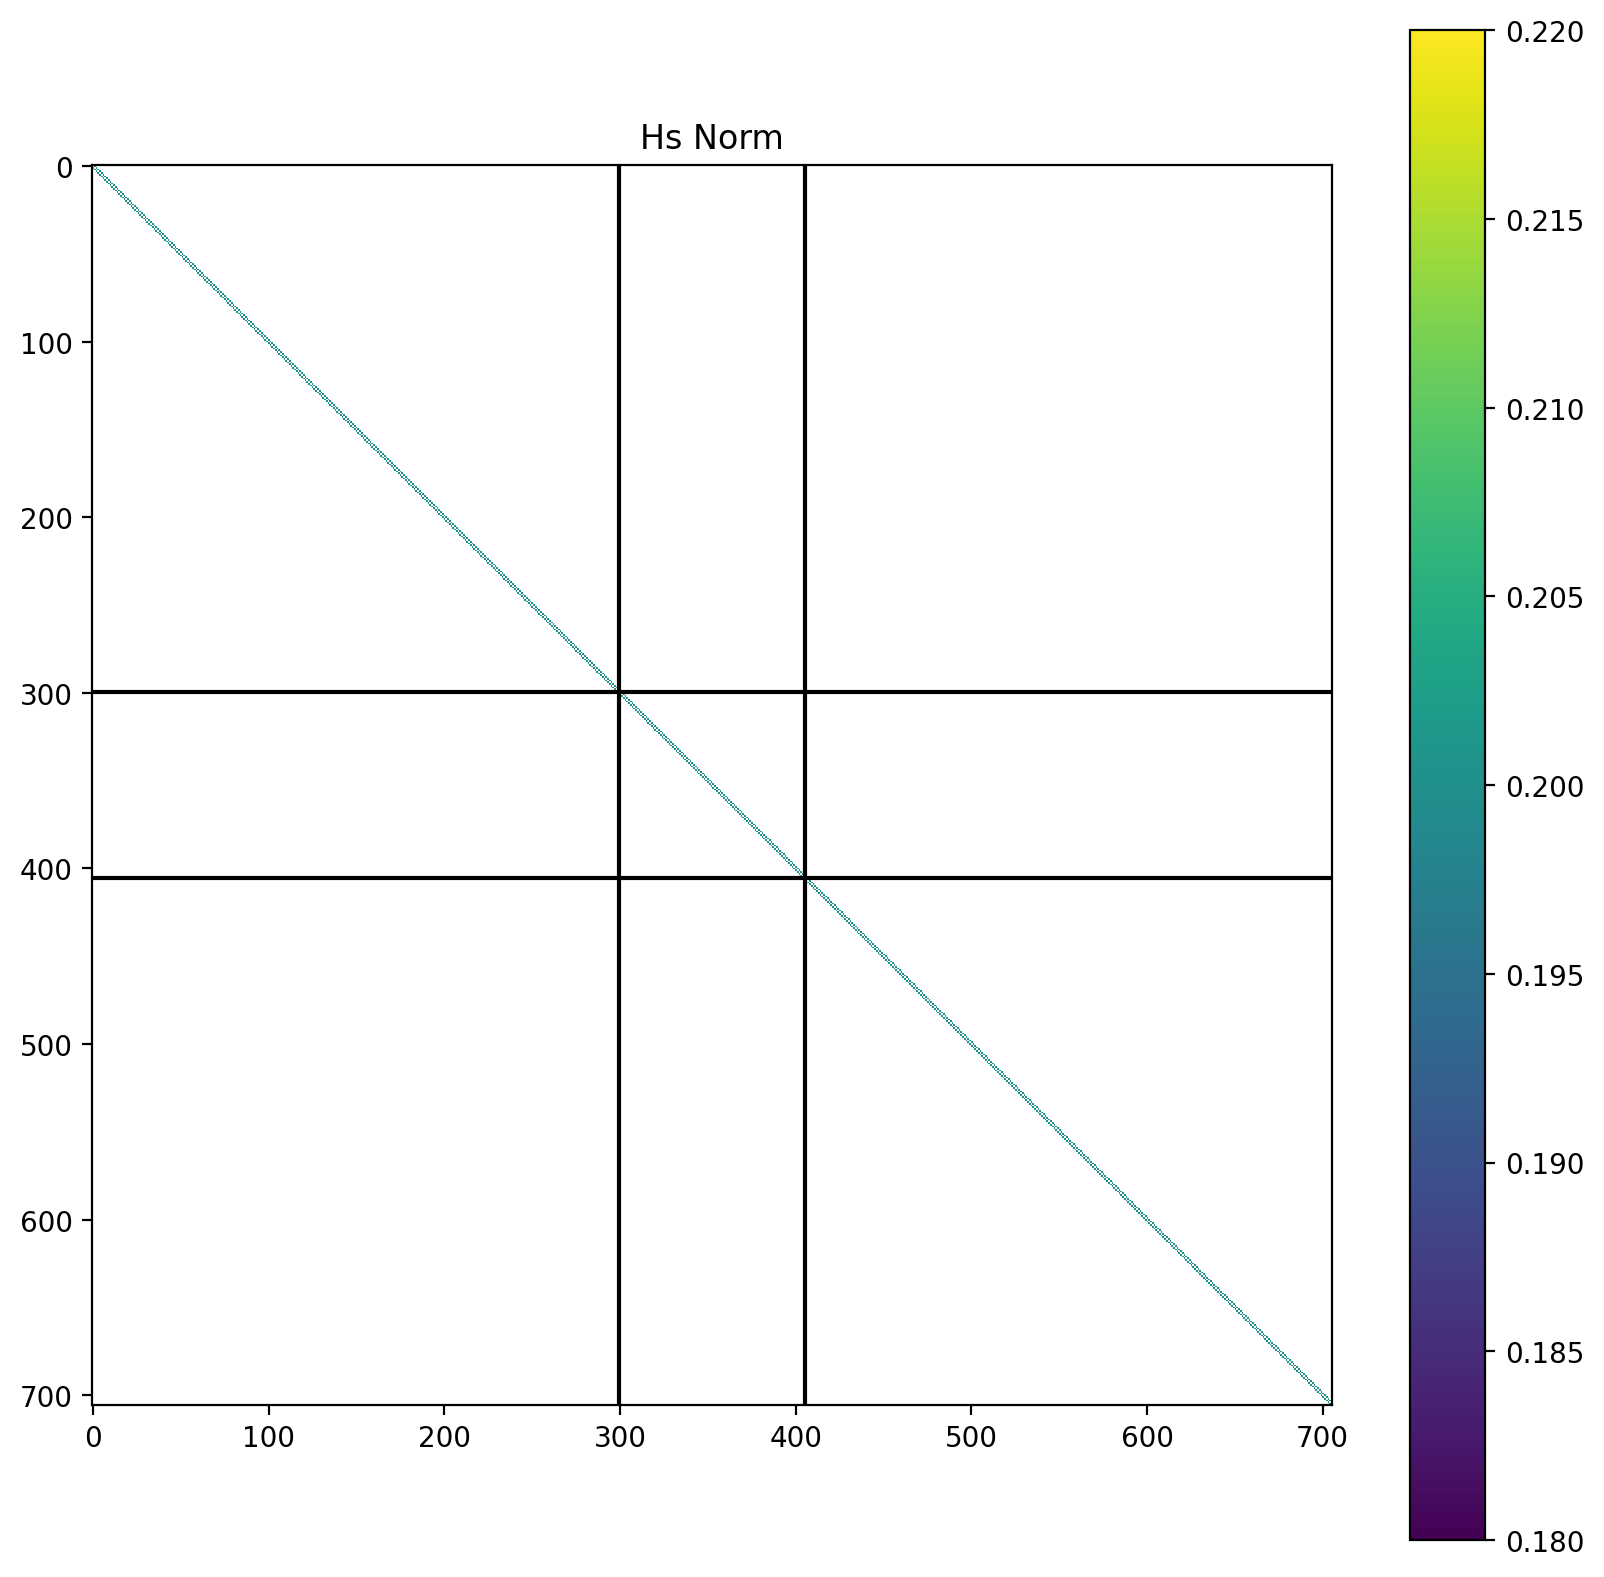

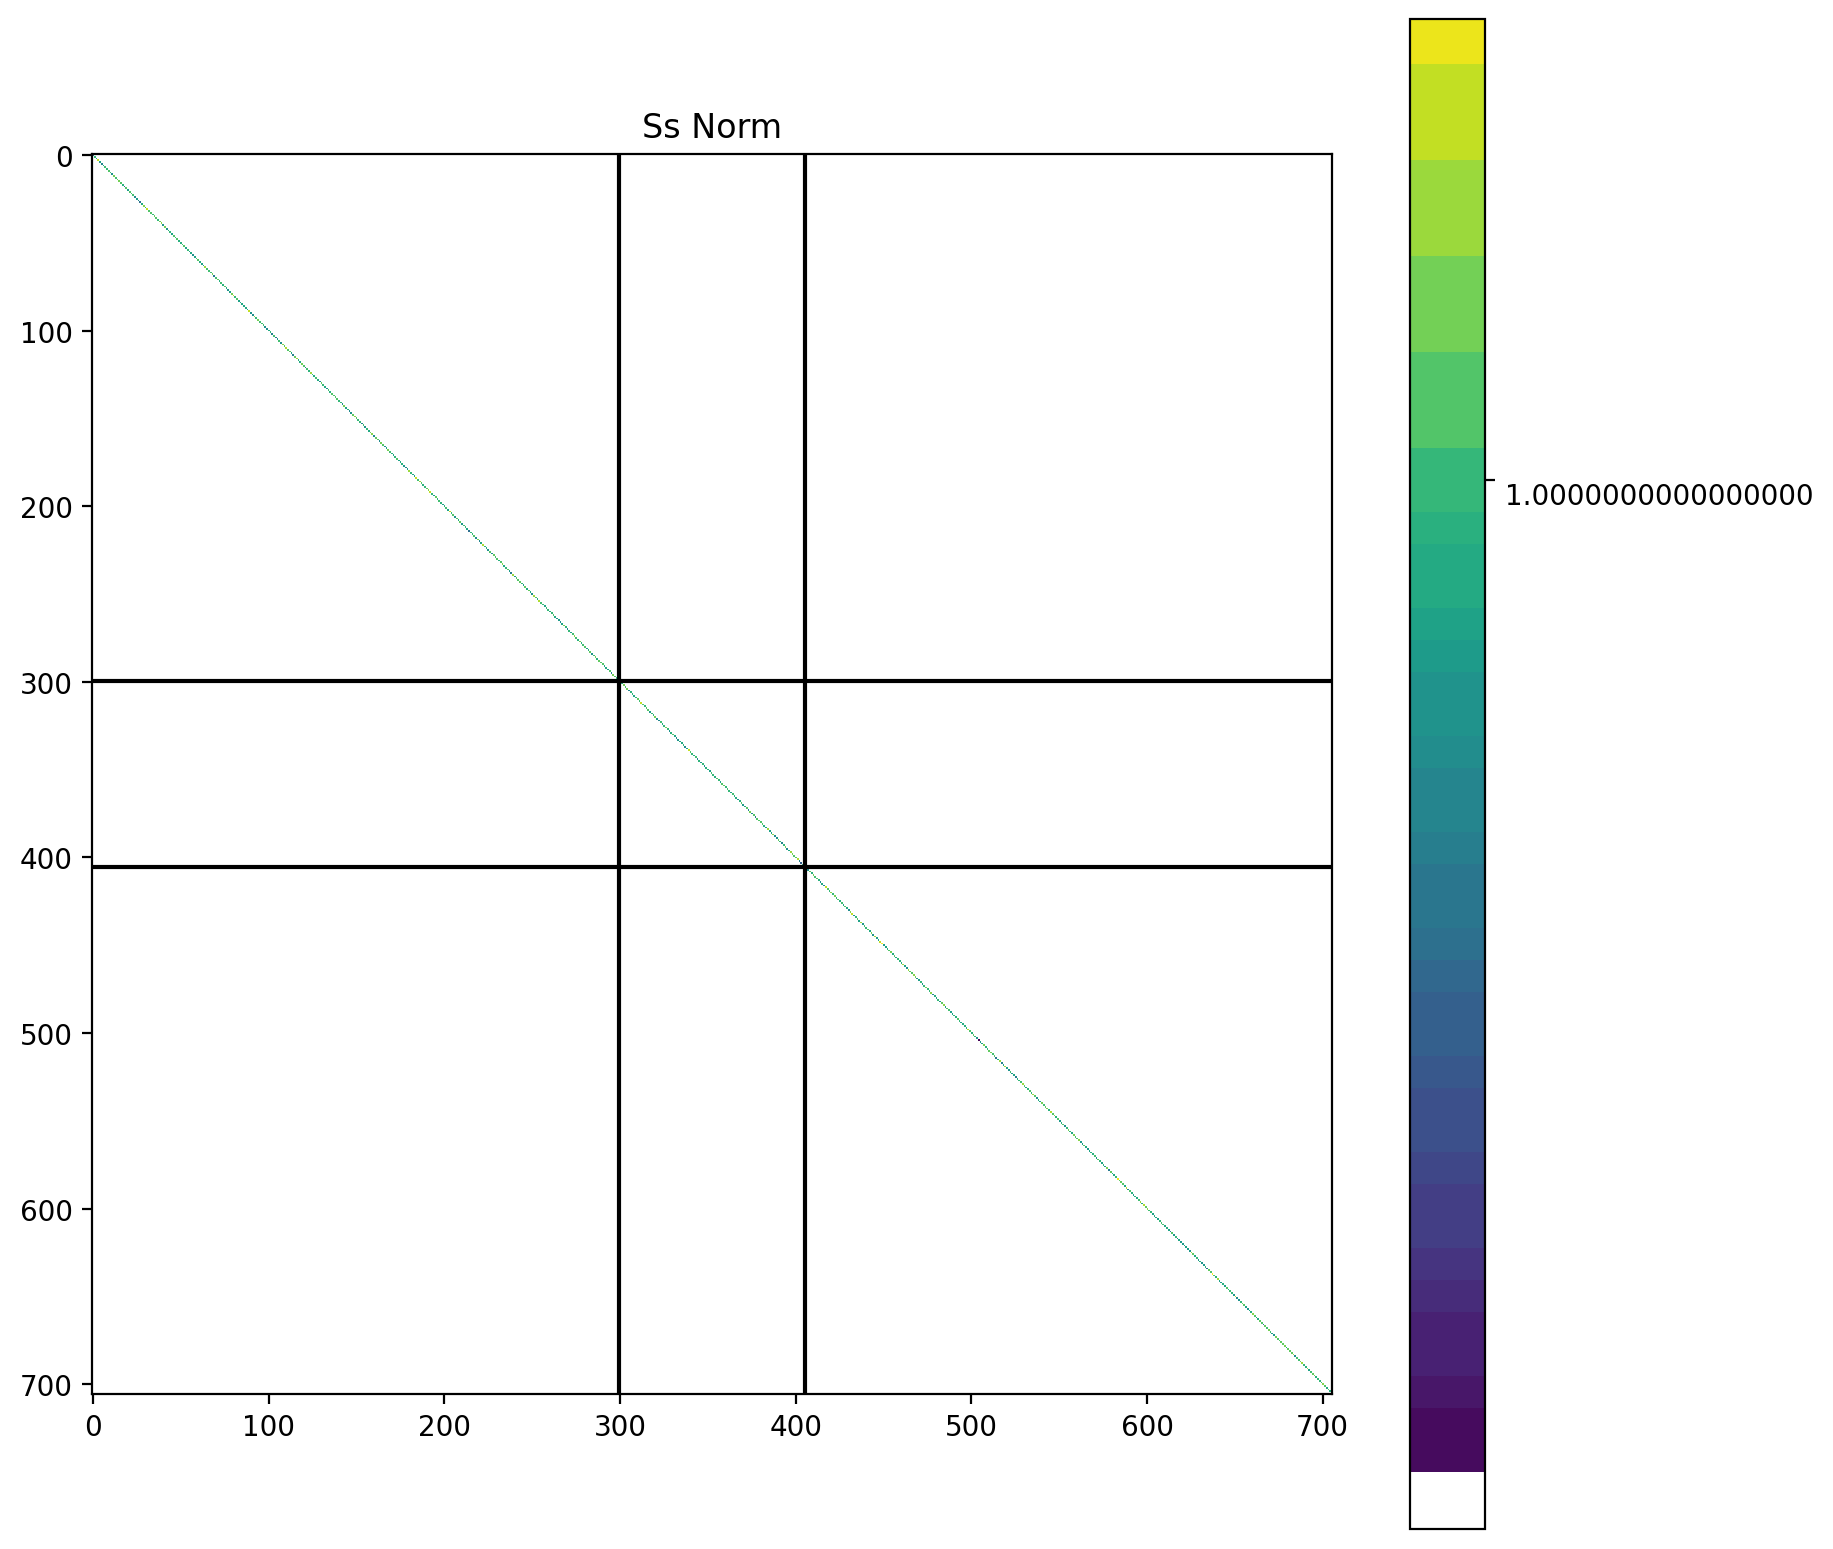

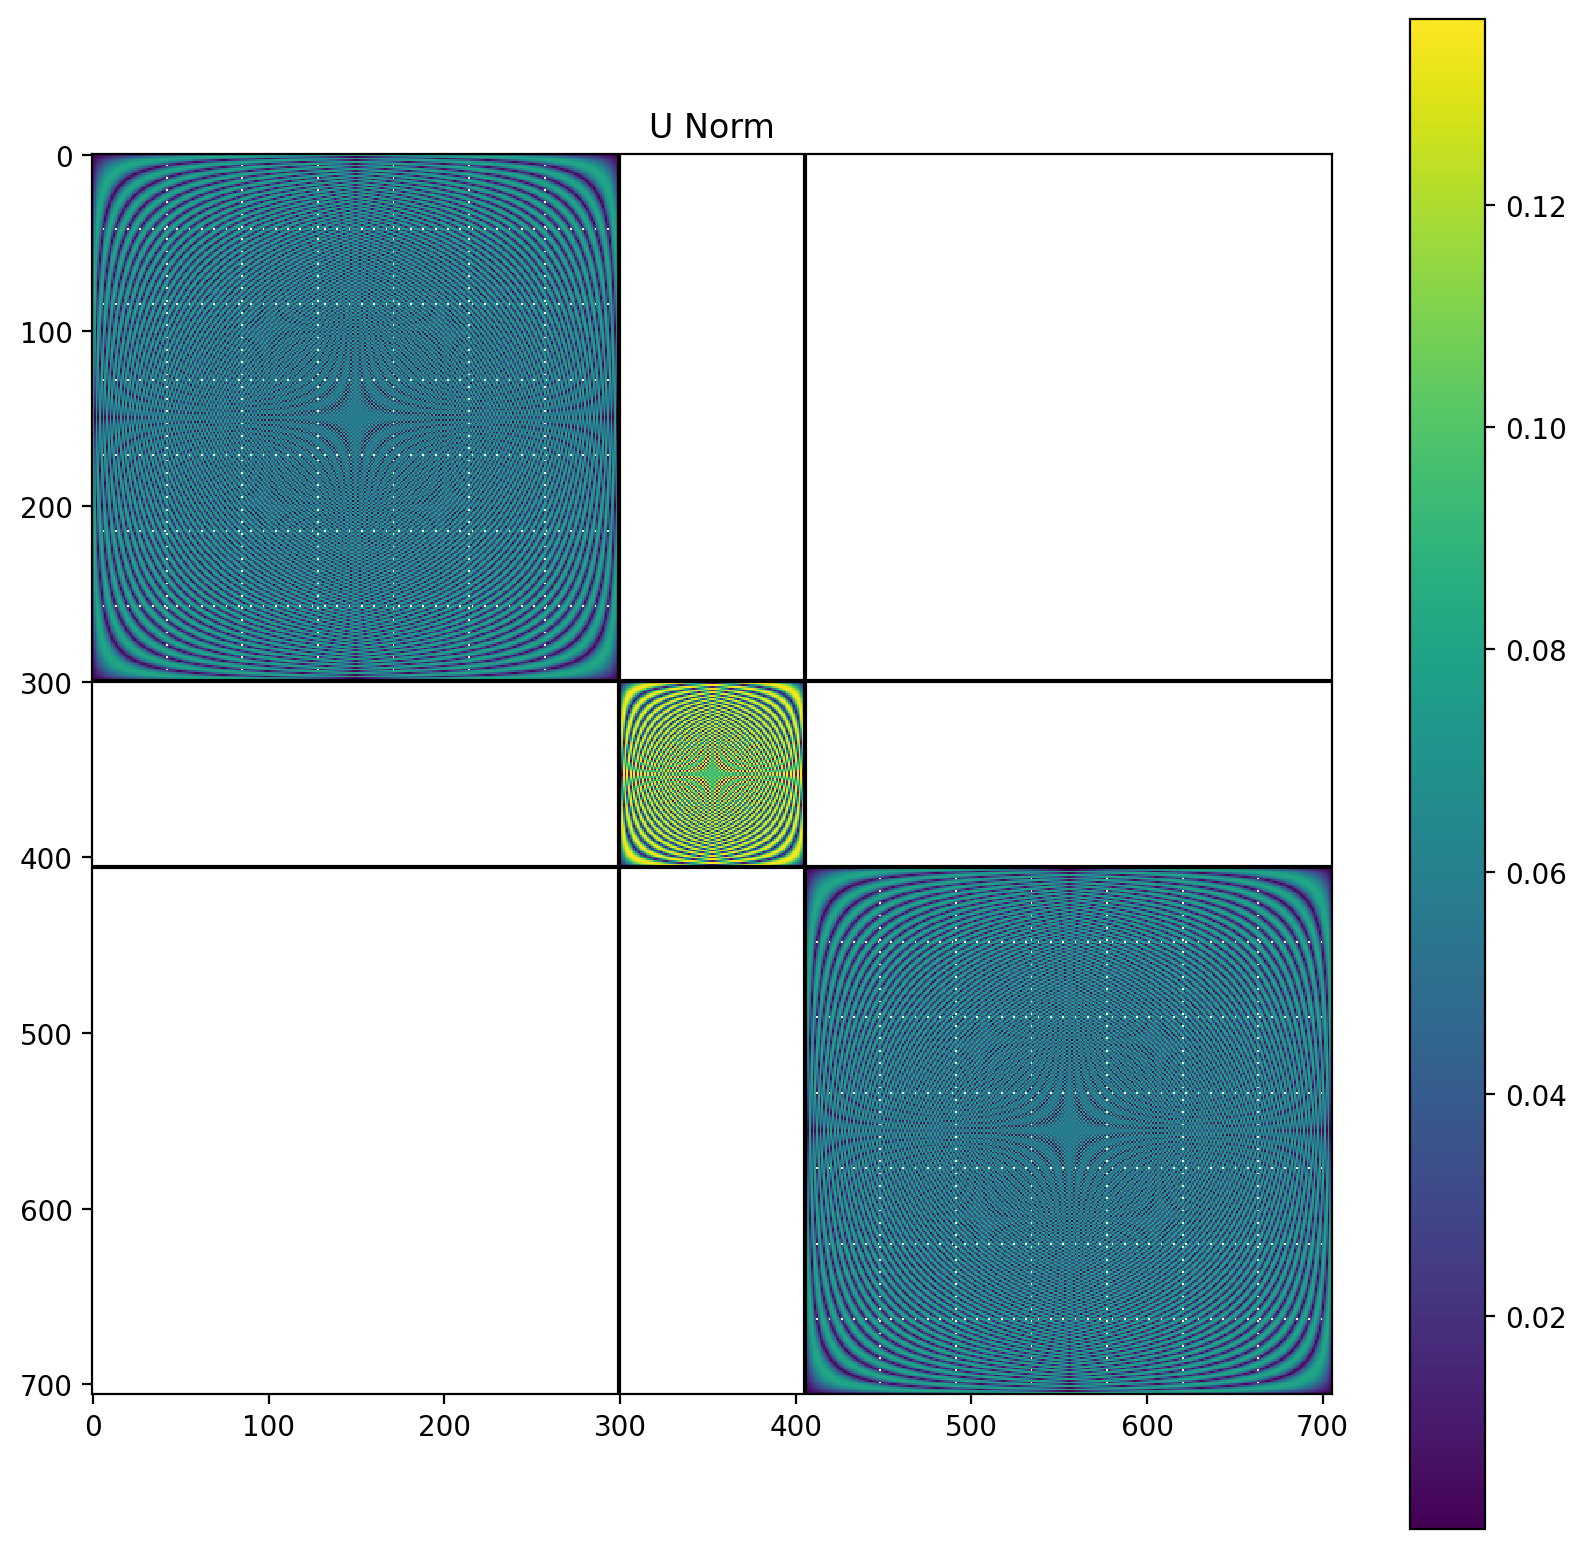

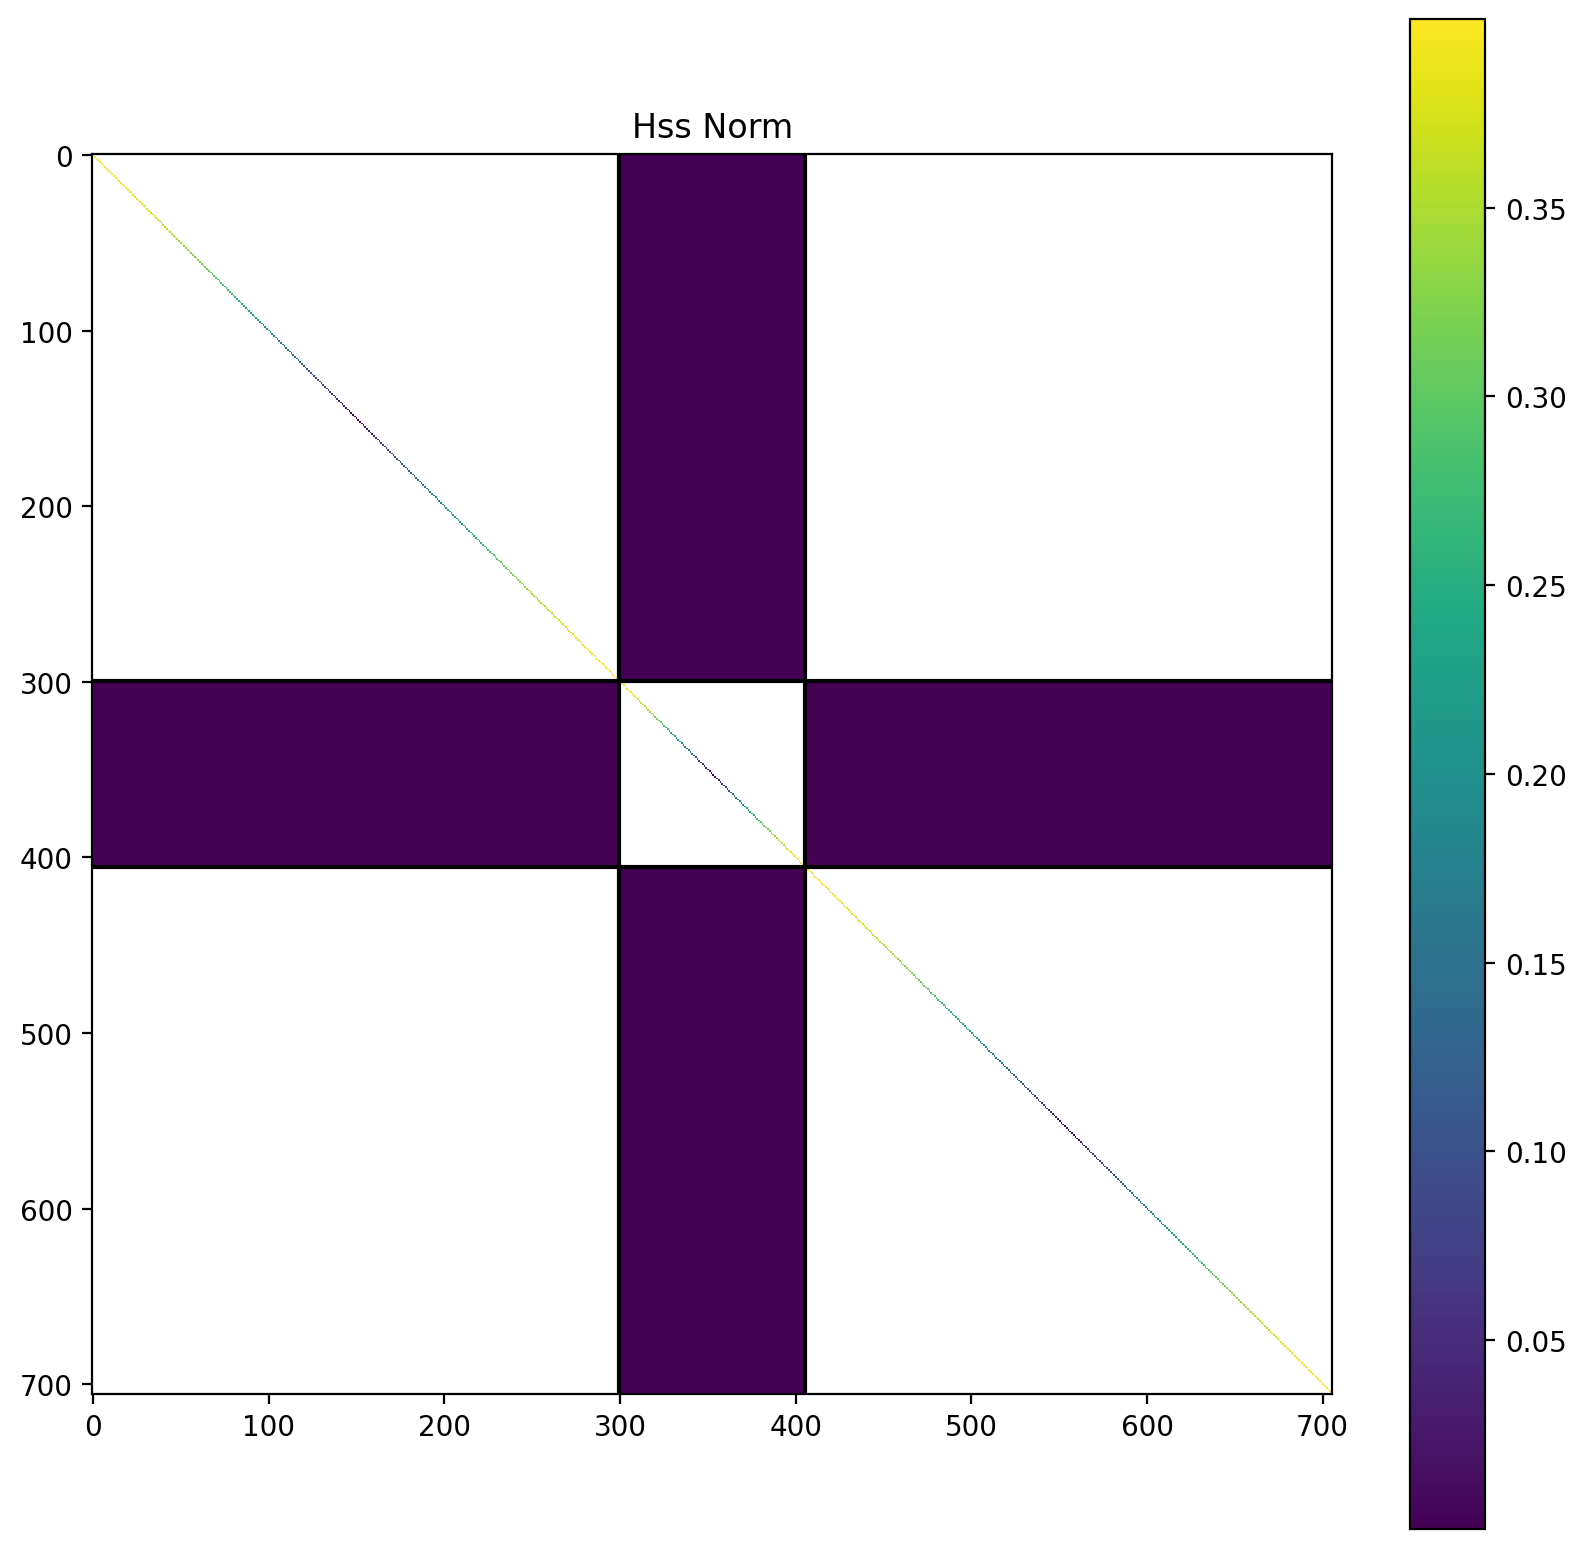

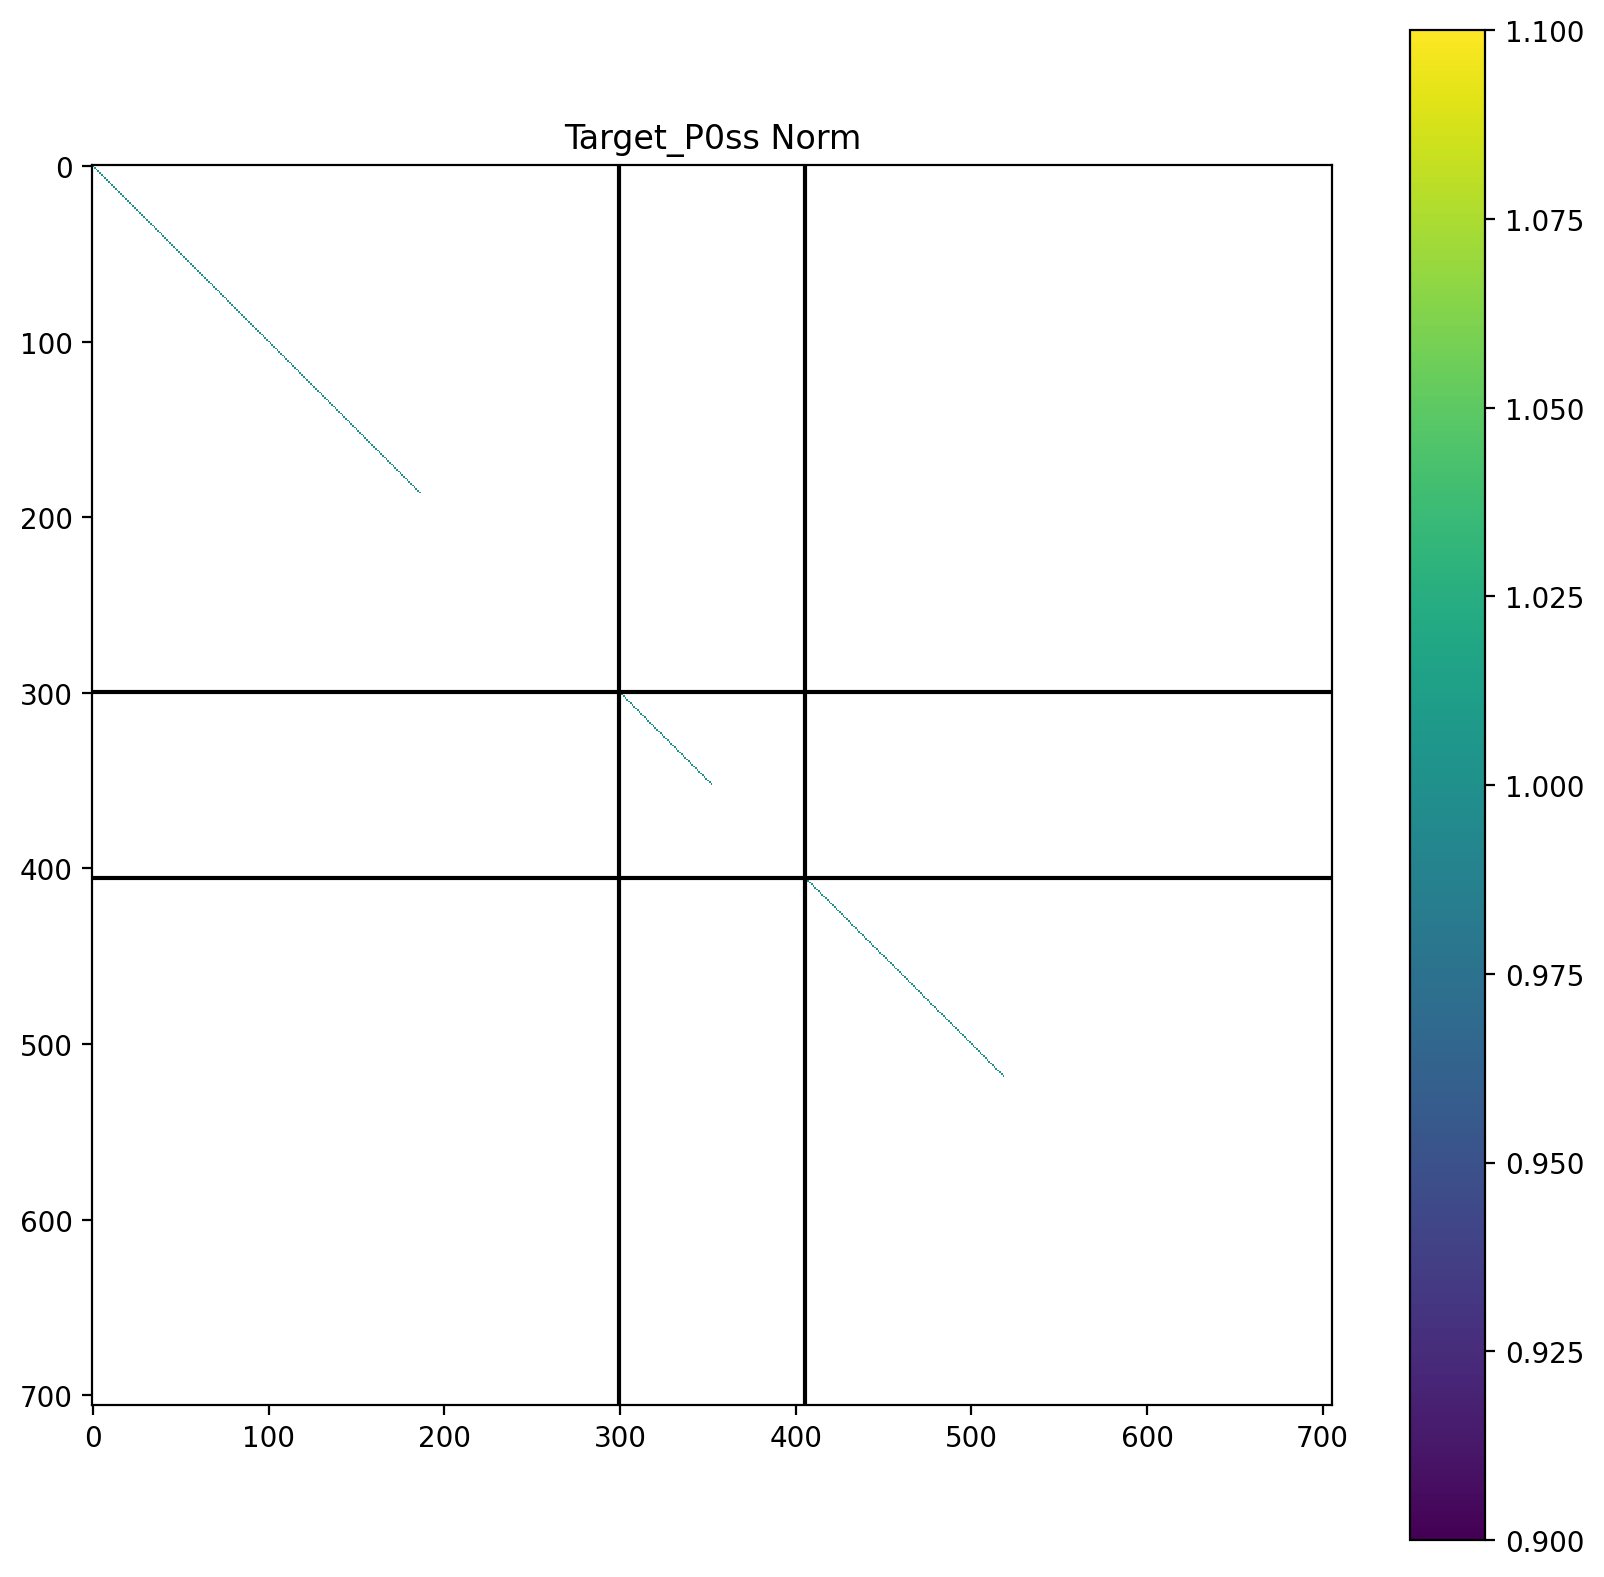

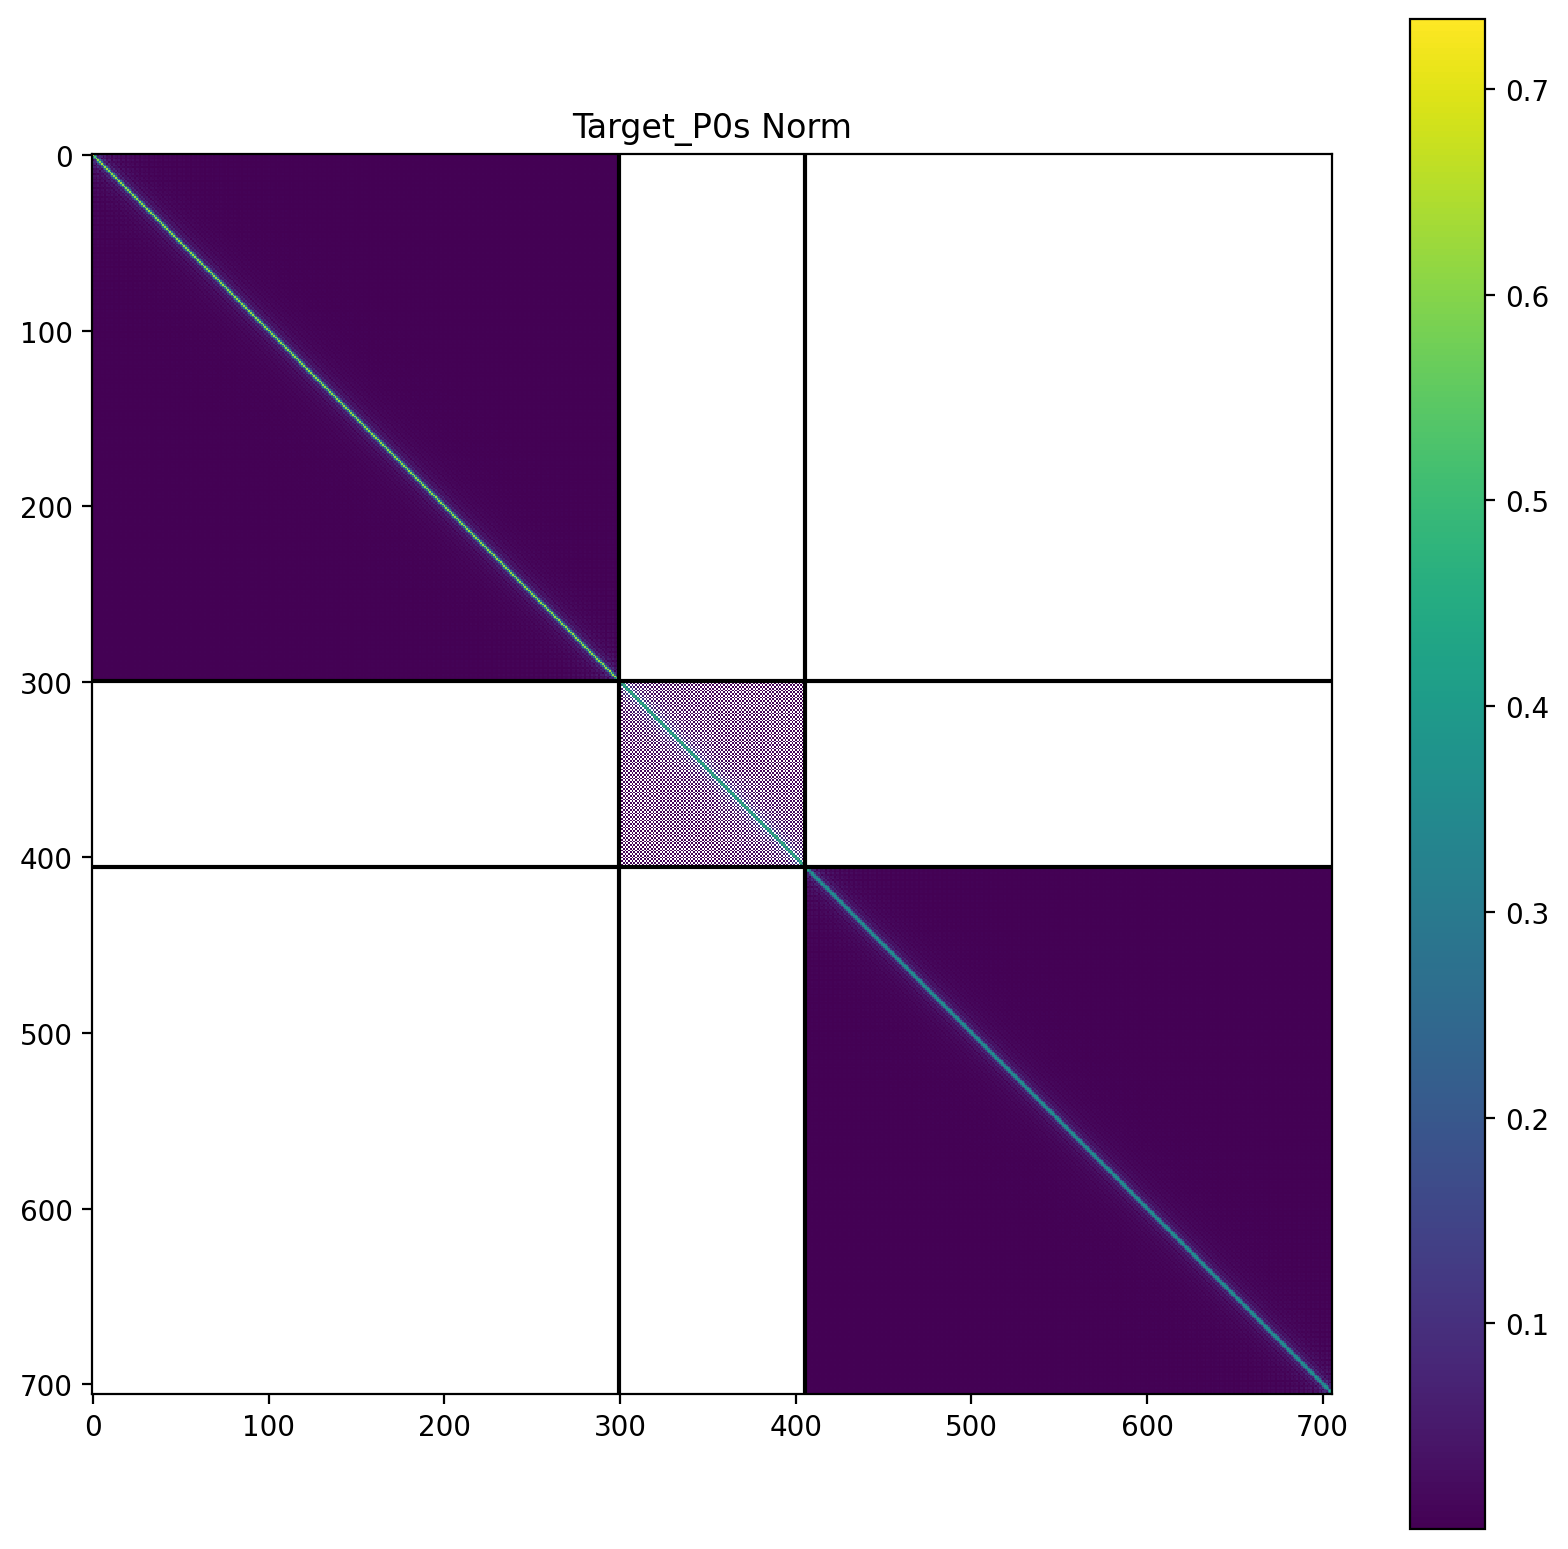

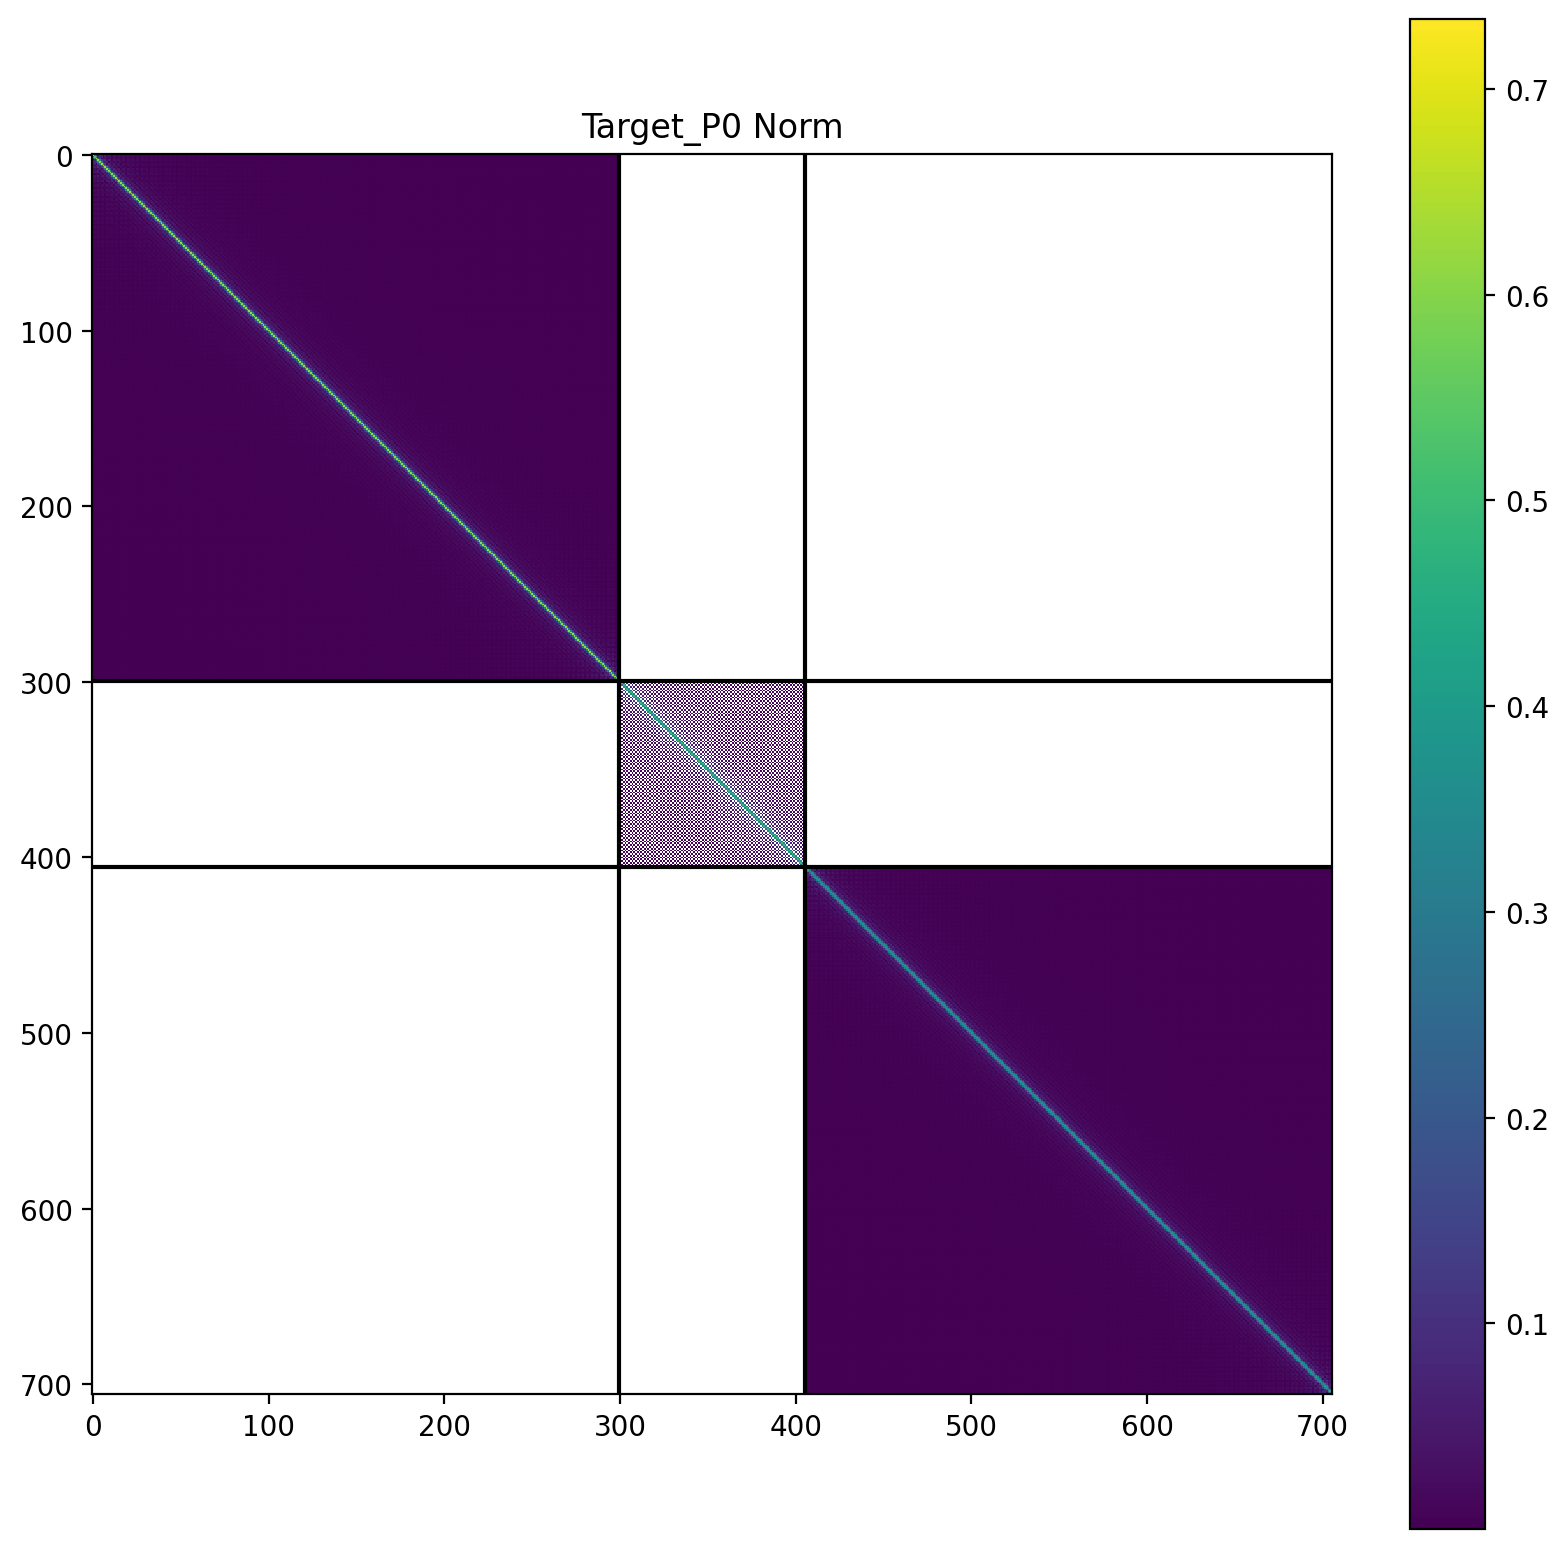

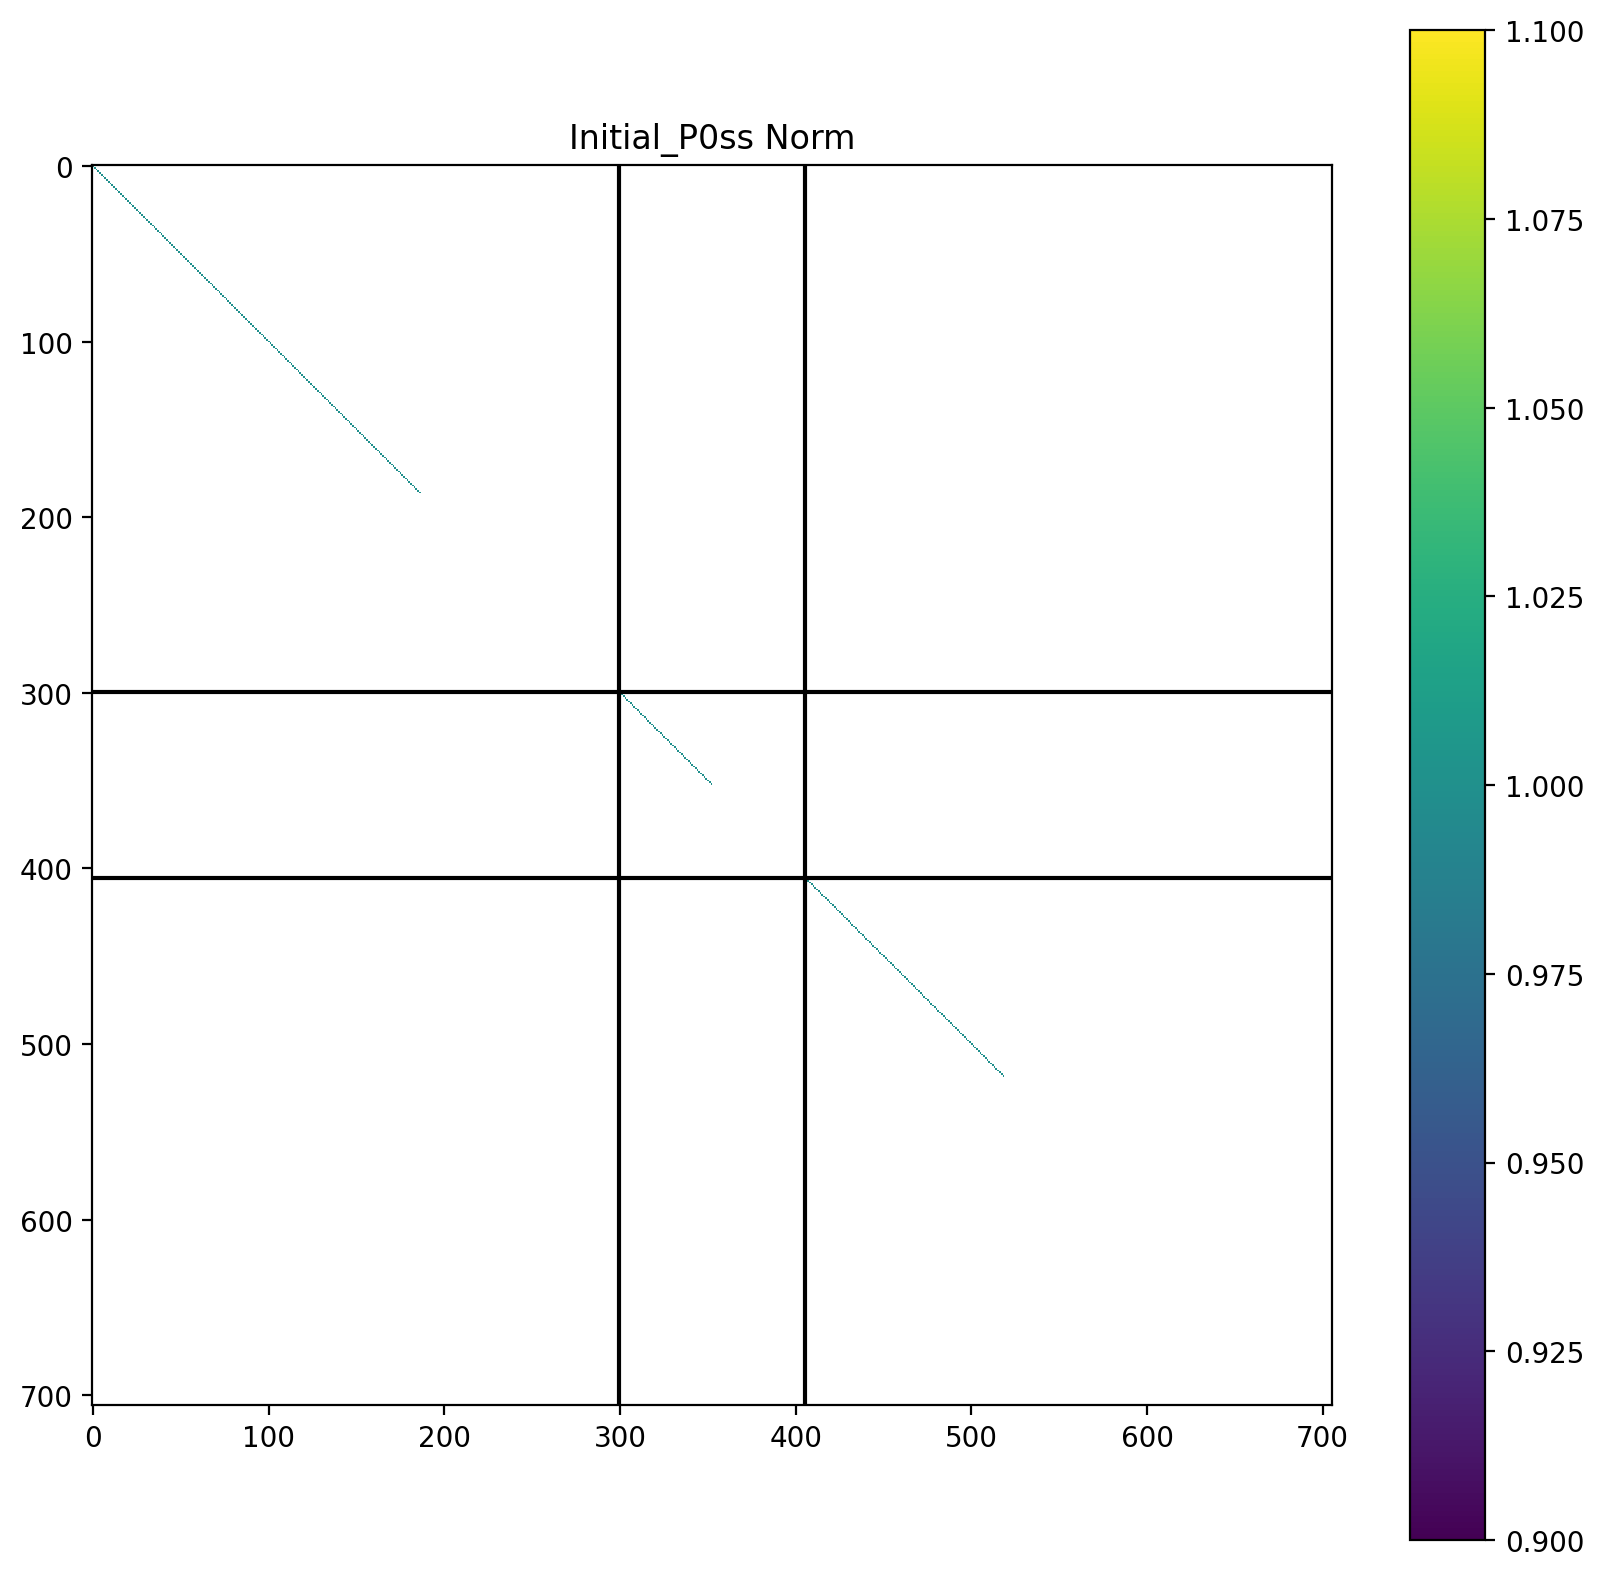

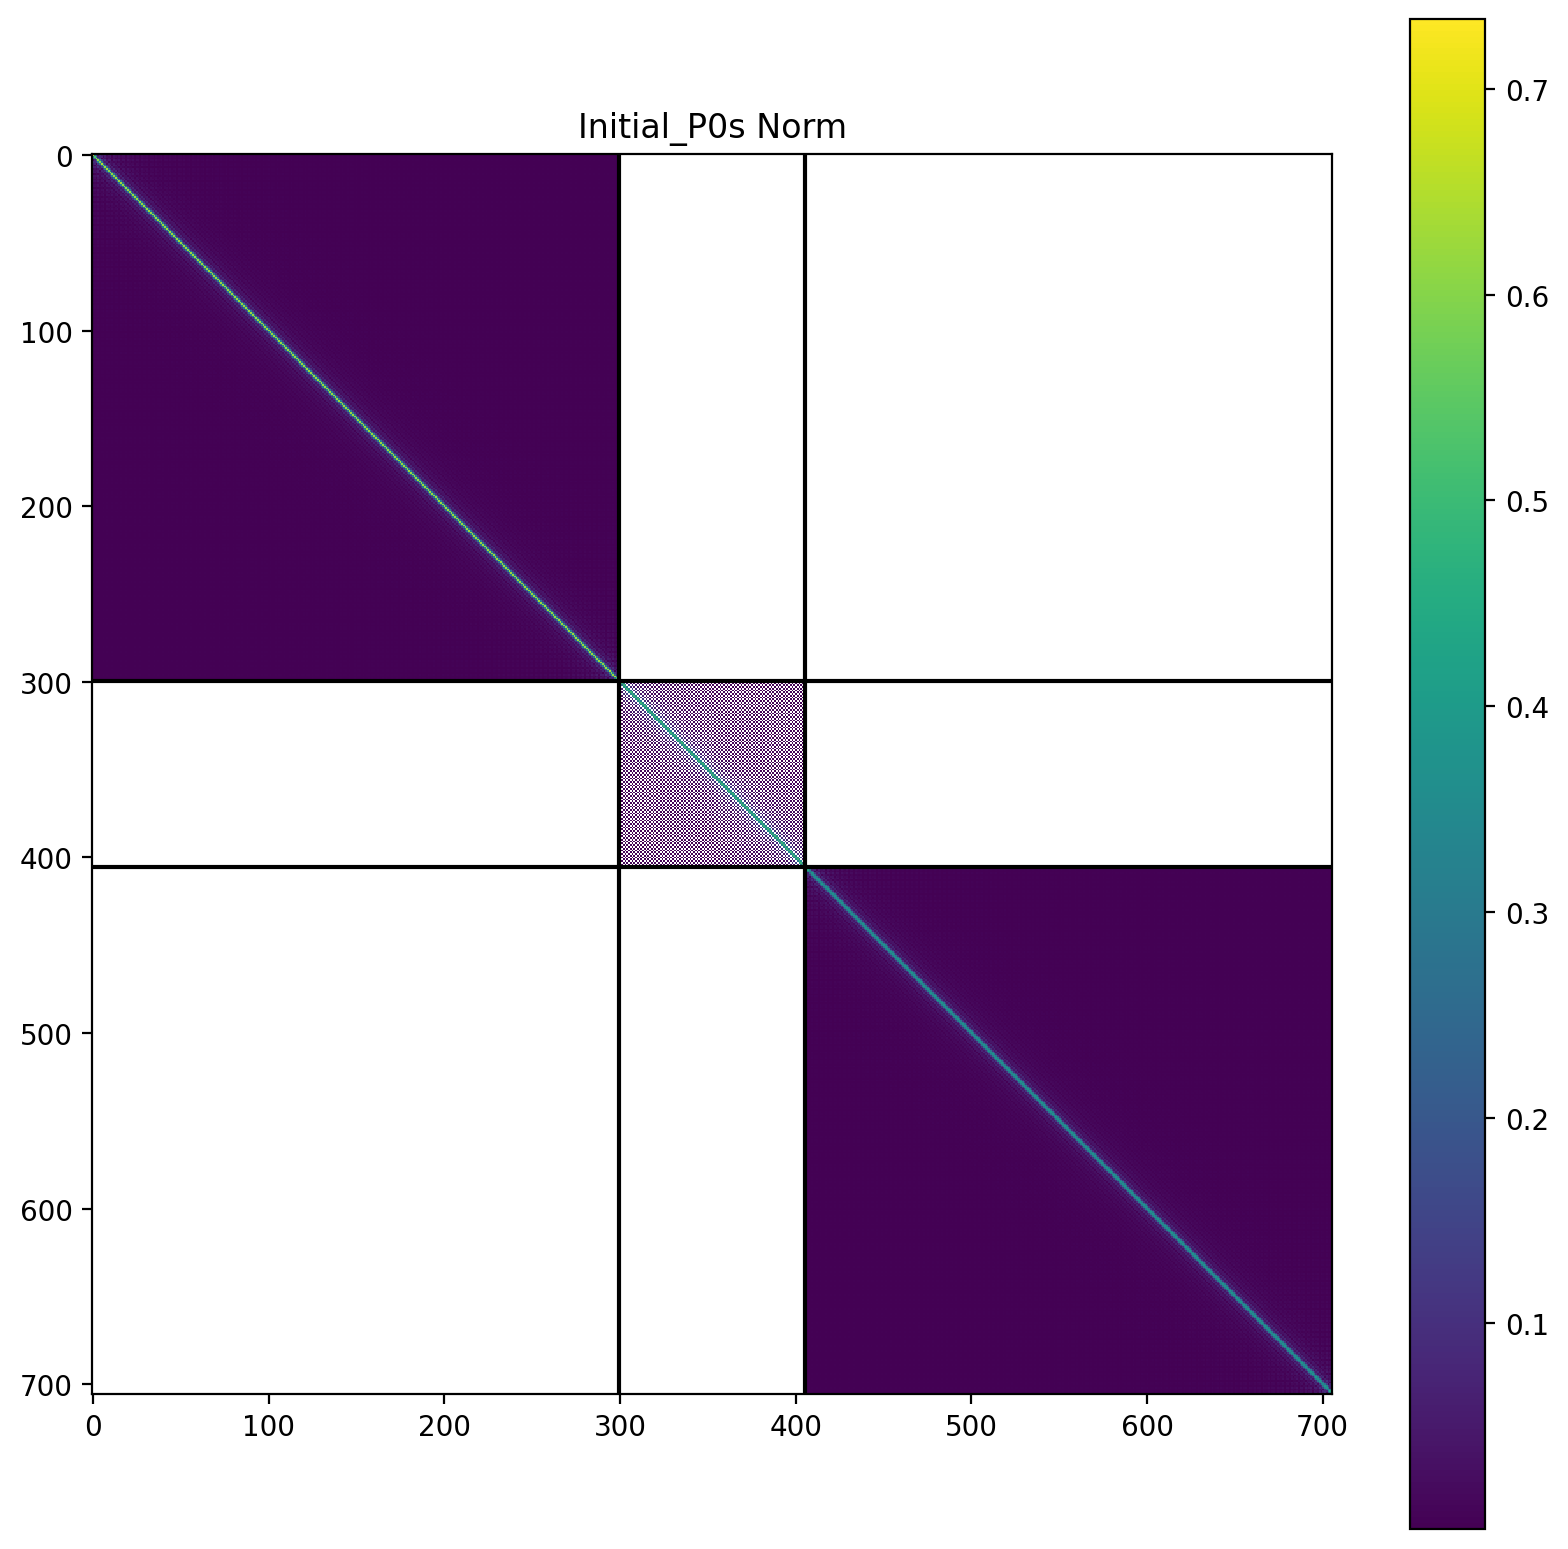

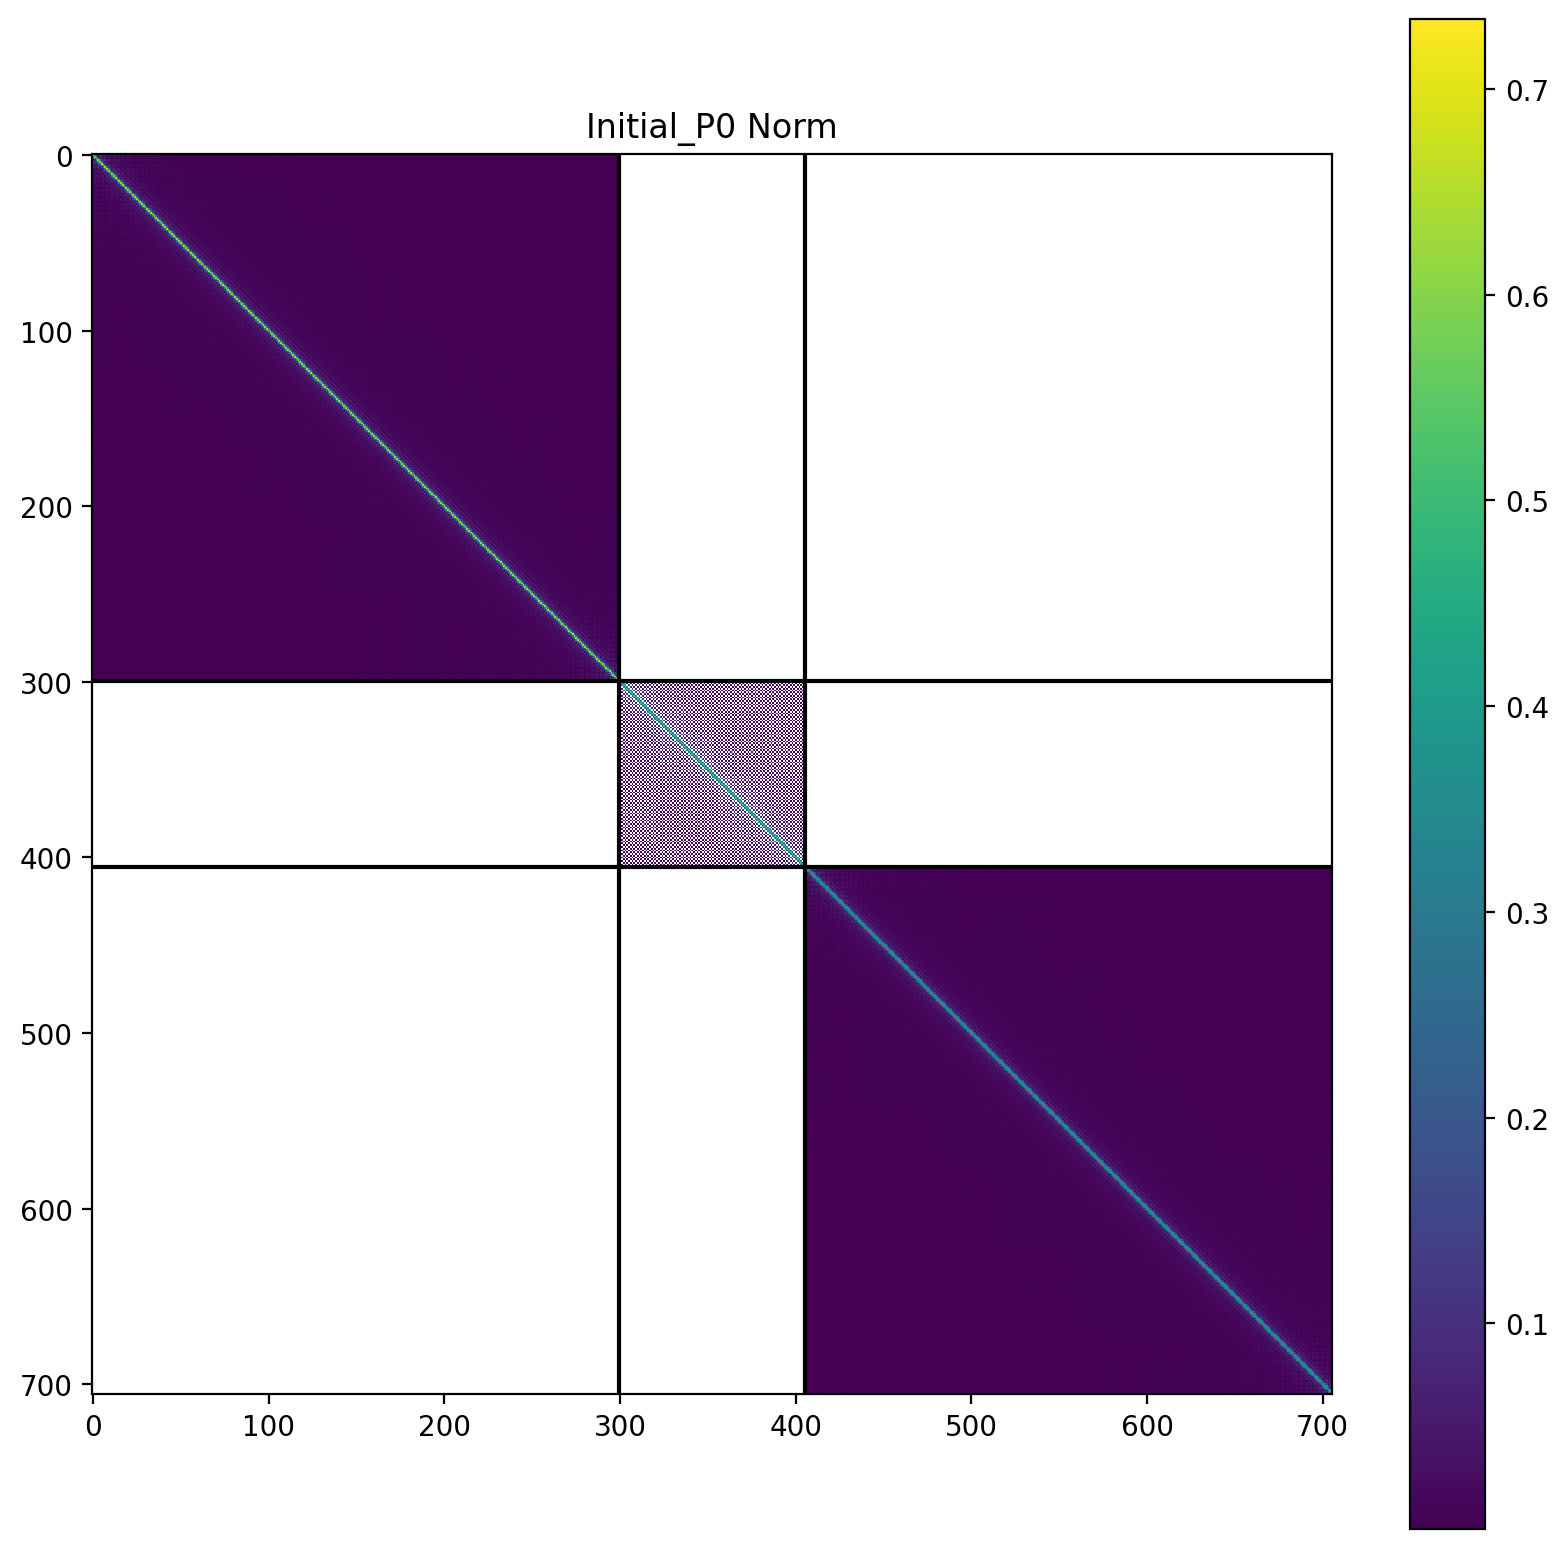

/cvmfs/sft.cern.ch/lcg/views/LCG_106a_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/cvmfs/sft.cern.ch/lcg/views/LCG_106a_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


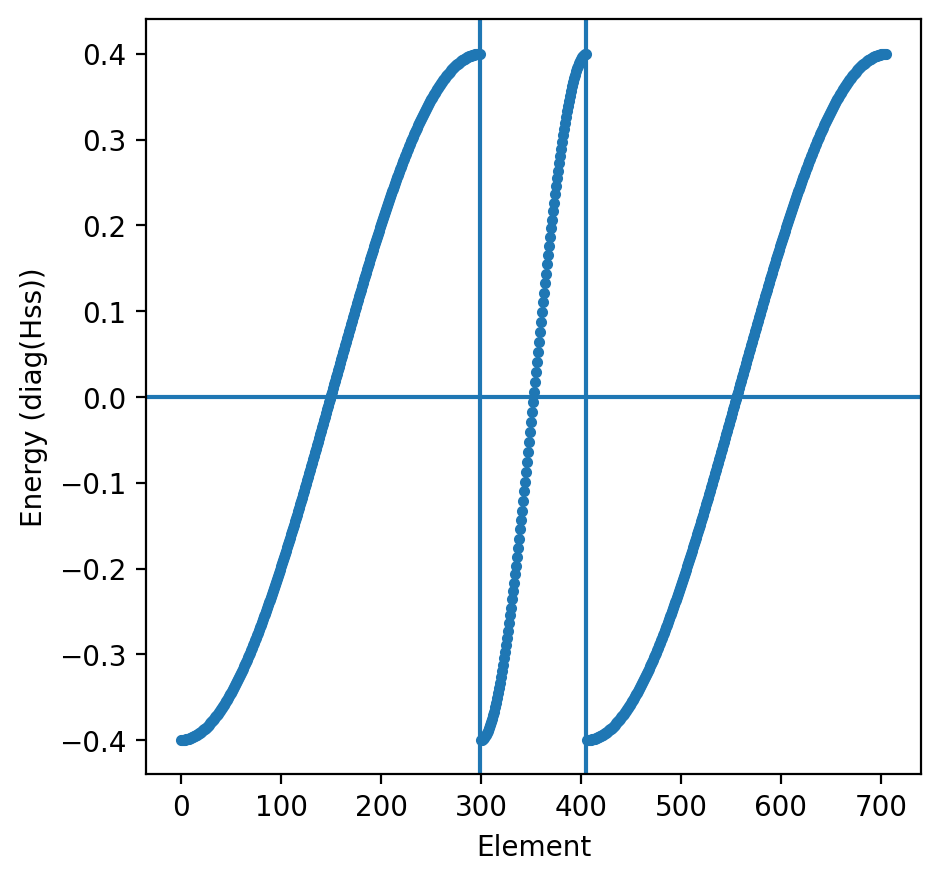

E_F_L= 2.3852447794681098e-17
E_F_R= -3.404394821604484e-17
E_F_EM= -5.594483210025203e-17
E_F= 2.168404344971009e-19


In [2]:
structure_config="Oded"
V_bias=0.3 #V
T_L=0 #K
T_R=0 #K
T_EM=0 #K

H, S, size_lead_L,size_lead_R = Get_Structure(structure_config)
device = Device(
    H=H, 
    S=S, 
    size_lead_L=size_lead_L,size_lead_R=size_lead_R,
    V_bias=V_bias,
    T_L=T_L, T_R=T_R, T_EM=T_EM,
    clean_matrices=True
)
device.Visualize()

In [ ]:
Delta_t   = 1 *fs
max_iters = 5000
max_t     = 1500*fs
list_of_outputs=["J All Elements"]
solver_type="RK45"
Gamma_in_invfs_list=[0,0.001,0.01,0.1,1]
picklefile="OdedPlotDataRK45_All_Gamma_All_Elements_Site.pkl"

try:
    with open(picklefile,"rb") as f:
        RESULTS=dill.load(f)
except:
    RESULTS={}

for Gamma_in_invfs in Gamma_in_invfs_list:
    print("Starting Gamma: ",Gamma_in_invfs, " invfs")
    if Gamma_in_invfs in RESULTS.keys():
        print("Already found, continuing")
        continue
    
    Gamma=Gamma_in_invfs*invfs
    solver = Solver(device,
        Gamma=Gamma, 
        Delta_t=Delta_t, 
        max_iters=max_iters, 
        list_of_outputs=list_of_outputs, 
        max_t=max_t
    )
    outputs_dict=solver.Propagate_In_Site(solver_type=solver_type)
    RESULTS[Gamma_in_invfs]=(solver.t_vec_in_fs,outputs_dict["J All Elements"])
    
    with open(picklefile,"wb") as f:
        dill.dump(RESULTS,f)
    print()

Starting Gamma:  0  invfs
Step 10 out of 5000 - Time: 17.03s
Delta_t, current_t [fs]= 1.3221959637659926 13.2636450636422
Step 20 out of 5000 - Time: 34.13s
Delta_t, current_t [fs]= 1.3154757195694806 26.448572559610223
Step 30 out of 5000 - Time: 51.53s
Delta_t, current_t [fs]= 1.3088413714959113 39.56676992121448
Step 40 out of 5000 - Time: 69.04s
Delta_t, current_t [fs]= 1.3022930197347202 52.6190967373189
Step 50 out of 5000 - Time: 86.54s
Delta_t, current_t [fs]= 1.295830672830374 65.60641309261635
Step 60 out of 5000 - Time: 103.83s
Delta_t, current_t [fs]= 1.2894542503331765 78.52957866542658
Step 70 out of 5000 - Time: 120.92s
Delta_t, current_t [fs]= 1.2831635858257744 91.38945185411227
Step 80 out of 5000 - Time: 138.13s
Delta_t, current_t [fs]= 1.2769584302721282 104.18688893557774
Step 90 out of 5000 - Time: 155.83s
Delta_t, current_t [fs]= 1.270838455636385 116.92274325878448
Step 100 out of 5000 - Time: 173.14s
Delta_t, current_t [fs]= 1.2648032587205744 129.5978644757004

In [ ]:
figsize=(5,5)
dpi=200
fig=plt.figure(figsize=figsize,dpi=dpi,facecolor="white")
for Gamma_in_invfs in RESULTS.keys():
    plt.plot(RESULTS[Gamma_in_invfs][0],[1e3*element[int(len(element)/2)-1] for element in RESULTS[Gamma_in_invfs][1]],label="{0:.3f}".format(Gamma_in_invfs)+" fs$^{-1}$")
plt.title("Device Current (Central)")  
plt.xlabel("Time [fs]")
plt.ylabel("-Current [mA]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-0.03,0.03)